# Центральная предельная теорема

## Для своего домашнего задания я выбрал распределение Парето, которое присутствует в scipy.stats.

### Комментарии из scipy reference.

The probability density function for pareto is:
pareto.pdf(x, b) = b / x ** (b+1)
for x >= 1, b > 0.

pareto takes b as a shape parameter.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the
loc and scale parameters. Specifically, pareto.pdf(x, b, loc, scale) is identically equivalent to
pareto.pdf(y, b) / scale with y = (x - loc) / scale.

### Ссылка на страницу с распределением в википедии
https://en.wikipedia.org/wiki/Pareto_distribution

In [1]:
#импортирование необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

### Генерация выборки объёма 1000

In [2]:
# зададим случайную величину по закону двойного распределения Вейбулла

#параметры распределения
k = 4.0
xm = 3.0

#frozen distribution
distributionRv = sts.pareto(k, loc=0, scale=xm)

# сгенерируем 1000 значений
distributionSample = distributionRv.rvs(1000)

#проверка задания распределения
print 'Theoretical mean: ', distributionRv.mean()
print 'Theoretical standard deviation: ', distributionRv.std()

Theoretical mean:  4.0
Theoretical standard deviation:  1.41421356237


### Построение гистограммы выборки и графика теоритеческой плотности распределения случайной величины

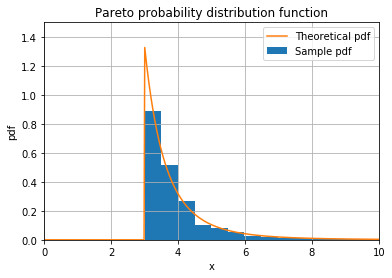

In [3]:
#гистограмма выборки
plt.hist(distributionSample, bins=30, normed=True, label='Sample pdf')

#теоретическая плотность распределения
x = np.linspace(0,20,1000)
pdf = distributionRv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.5])
plt.title('Pareto probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

### Генерация 1000 выборой объёма n (5, 10, 50) и построение гистограммы распределений их выборочных средних.

In [4]:
#количество выборок
sampleNum = 1000

#массив объёма выборок
sampleVolume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros( (len(sampleVolume), sampleNum) )

#вычисление выборочных средних значений и занесение в массив
for i in xrange( len(sampleVolume) ):
    for j in xrange(sampleNum):
        distributionSampleTemp = np.array( sts.pareto.rvs(k, loc=0, scale=xm, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean
        
print distributionSamples        

[[ 4.12723441  5.04642839  4.27703884 ...,  4.03069524  4.46696578
   3.61091393]
 [ 3.48564158  5.7061721   5.1059444  ...,  4.16412216  3.88185124
   4.07345939]
 [ 3.65668319  3.78094585  3.83097124 ...,  3.8979316   4.62825512
   3.61950959]]


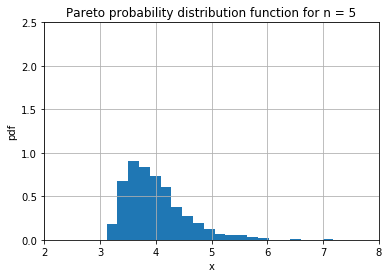

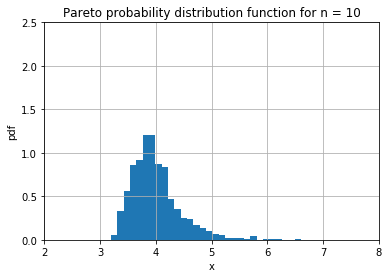

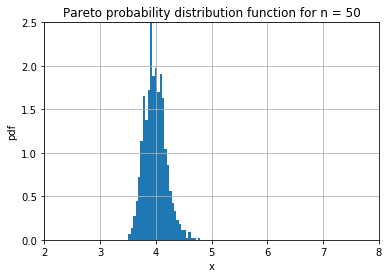

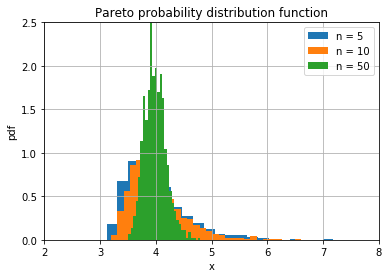

In [5]:
#гистограммы выборки
for i in xrange( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in xrange( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

### Вычисление параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних

In [6]:
#Математическое ожидание и дисперсия

distributionSampleMean = k * xm / (k - 1)
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in xrange( len(sampleVolume) ):
    distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / sampleVolume[i]
    
print 'Математическое ожидание: ' + str(distributionSampleMean)
for i in xrange( len(sampleVolume) ):
    print 'Дисперсия для n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i])

Математическое ожидание: 4.0
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04


### Нарисовать плотность соответствующего нормального распределения поверх каждой гистограммы

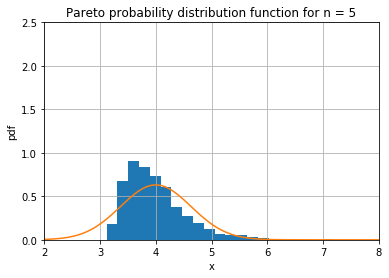

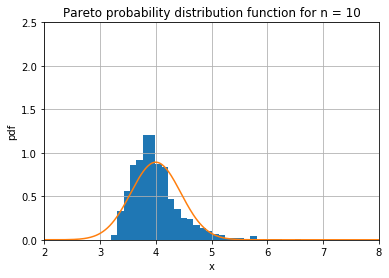

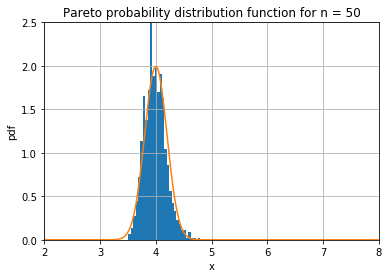

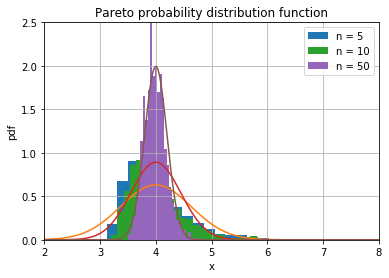

In [7]:
#гистограммы выборки
for i in xrange( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in xrange( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

### Выводы по результатам задания

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы.

С ростом n точность нормальной аппроксимации увеличивается.